# 03 - ***Machine Learning Project for Mining Industry***: How to Choose the Best Location to Drill a New Well?

### The client company: GlavRosGosNeft
**We have to decide where to drill a new well.**

### Data

Data of oil samples in three regions is provided: in each of 10,000 fields, where the quality of oil and the volume of its reserves have been measured. 

### Project objectives

- Build a machine learning model to help determine the region where mining will bring the most profit. 

- Analyze possible profits and risks using *Bootstrap* technique

### Projects stages
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них нужно выбрать регион с наибольшей средней прибылью.

In [20]:
pip install -q pandas-profiling


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: /usr/local/Cellar/jupyterlab/3.4.8/libexec/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from scipy import stats as st # для доверительного интервала

sns.set()
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None 

## 1. Data Load

In [22]:
data_0 = pd.read_csv("/Users/yuliabezginova/Documents/DS/praktikum/project-7_ML_in_business/geo_data_0.csv")
data_1 = pd.read_csv("/Users/yuliabezginova/Documents/DS/praktikum/project-7_ML_in_business/geo_data_1.csv")
data_2 = pd.read_csv("/Users/yuliabezginova/Documents/DS/praktikum/project-7_ML_in_business/geo_data_2.csv")

In [23]:
print(data_0.shape)
print(data_0.head(5))
data_0.info()

(100000, 5)
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [24]:
print(data_1.shape)
print(data_1.head(5))
data_1.info()

(100000, 5)
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [25]:
print(data_2.shape)
print(data_2.head(5))
data_2.info()

(100000, 5)
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [26]:
report_0 = ProfileReport(data_0)
report_0

NameError: name 'ProfileReport' is not defined

In [ ]:
report_1 = ProfileReport(data_1)
report_1

In [ ]:
report_2 = ProfileReport(data_2)
report_2

In [ ]:
pd.DataFrame(round(data_0.isna().mean() * 100, )).style.background_gradient('coolwarm')

In [ ]:
pd.DataFrame(round(data_1.isna().mean() * 100, )).style.background_gradient('coolwarm')

In [ ]:
pd.DataFrame(round(data_2.isna().mean() * 100, )).style.background_gradient('coolwarm')

Удалим столбцы, которые не будут участвовать в моделировании.

In [27]:
data_0 = data_0.drop(columns=['id'])

In [28]:
data_1 = data_1.drop(columns=['id'])

In [29]:
data_2 = data_2.drop(columns=['id'])

### Three datasets are clean and ready for modelling.

**ВЫВОД: Данные готовы к дальнейшему анализу. По корреляционной матрице Пирсона в данных второго местрождения data_1 прослеживается сильная зависимость (k=1.0) между признаком f2 и таргетом product. Из-за этого может быть низкое значение среднеквадратической ошибки (mean squared error, MSE)**.

Линейная регрессия или обычный метод наименьших квадратов (ordinary least squares, OLS) – это самый простой и наиболее традиционный метод регрессии. Линейная регрессия находит параметры w и b, которые минимизируют среднеквадратическую ошибку (mean squared error) между спрогнозированными и фактическими ответами у в обучающем наборе. **Среднеквадратичная ошибка равна сумме квадратов разностей между спрогнозированными и фактическими значениями.**

## 2. Machine Learning Trainig and Model Check for Adequacy

### 2.1 Data split into trianing and validation samples

```
We split the sample in the proportion as follows:
- 75% train_data
- 25% validation_data

```

Let's write a function for dividing datasets into samples and extracting features and a target feature from them.

In [30]:
def split_func(data):
    train_data, validation_data = train_test_split(data, test_size=0.25, random_state=2355555)
    print('Train sample size (data_2):', train_data.shape[0])
    print('Validation sample size (data_2):', validation_data.shape[0])
    
    train_data_features = train_data.drop(['product'], axis=1)
    train_data_target = train_data['product']
    
    validation_data_features = validation_data.drop(['product'], axis=1)
    validation_data_target = validation_data['product'] # already converted into type 'Series'
    # validation_data_target = pd.Series(validation_data_target)
    # print(type(validation_data_target))
    
    validation_data_target.reset_index(drop=True, inplace=True) # ура
    
    return (train_data_features, 
           train_data_target,
           validation_data_features,
           validation_data_target)

### 2.2 Determine features and targets for the model

In [31]:
train_data_0_features, train_data_0_target, validation_data_0_features, validation_data_0_target = split_func(data_0)

Train sample size (data_2): 75000
Validation sample size (data_2): 25000


In [32]:
train_data_1_features, train_data_1_target, validation_data_1_features, validation_data_1_target = split_func(data_1)

Train sample size (data_2): 75000
Validation sample size (data_2): 25000


In [33]:
train_data_2_features, train_data_2_target, validation_data_2_features, validation_data_2_target = split_func(data_2)

Train sample size (data_2): 75000
Validation sample size (data_2): 25000


### 2.3 Modelling

**Линейная регрессия или обычный метод наименьших квадратов (ordinary least squares, OLS)** – это самый простой и наиболее традиционный метод регрессии. Линейная регрессия находит параметры w и b, которые минимизируют среднеквадратическую ошибку (mean squared error) между спрогнозированными и фактическими ответами у в обучающем наборе. 

Среднеквадратичная ошибка равна сумме квадратов разностей между спрогнозированными и фактическими значениями. Линейная регрессия проста, что является преимуществом, но в то же время у нее нет инструментов, позволяющих контролировать сложность модели.

Параметры «наклона» (w), также называемые весами или коэффициентами (coefficients), хранятся в атрибуте coef_, тогда как сдвиг (offset) или константа (intercept), обозначаемая как b, хранится в атрибуте intercept_:


https://github.com/earlgreyness/python-code-conventions

In [34]:
lin_reg_0 = LinearRegression().fit(train_data_0_features, train_data_0_target)

In [35]:
print("R-squared data_0: {}".format(lin_reg_0.score(train_data_0_features, train_data_0_target)))
print("lr.coef_: {}".format(lin_reg_0.coef_))
print("lr.intercept_: {}".format(lin_reg_0.intercept_))

R-squared data_0: 0.27582137638120663
lr.coef_: [  3.81421622 -14.35736273   6.59029776]
lr.intercept_: 77.68335186069055


In [36]:
lin_reg_1 = LinearRegression().fit(train_data_1_features, train_data_1_target)

In [37]:
print("R-squared data_1: {}".format(lin_reg_1.score(train_data_1_features, train_data_1_target)))
print("lr.coef_: {}".format(lin_reg_1.coef_))
print("lr.intercept_: {}".format(lin_reg_1.intercept_))

R-squared data_1: 0.9996233106159619
lr.coef_: [-1.44781028e-01 -2.17133224e-02  2.69516242e+01]
lr.intercept_: 1.6558458464523227


In [38]:
lin_reg_2 = LinearRegression().fit(train_data_2_features, train_data_2_target)

In [39]:
print("R-squared data_2: {}".format(lin_reg_2.score(train_data_2_features, train_data_2_target)))
print("lr.coef_: {}".format(lin_reg_2.coef_))
print("lr.intercept_: {}".format(lin_reg_2.intercept_))

R-squared data_2: 0.1958209915640674
lr.coef_: [-0.03742837  0.03198511  5.69847028]
lr.intercept_: 80.86379460484727


FYI

Что за странный символ подчеркивания в конце названий атрибутов coef_ и intercept_? 

Библиотека scikit-learn всегда хранит все, что является производным от обучающих данных, в атрибутах, которые заканчиваются символом подчеркивания. Это делается для того, чтобы не спутать их с пользовательскими параметрами.

### ***Conclusion***: the model on the first and third dataset trains poorly, since the R-squared values ​​are low. For example, on the first dataset, the model trains only 27% of the sample, on the third - only 19.5%. Of the three trained models, the best R-squared = 99.9% is obtained on the second dataset. Let's take this model as the best one and use it for predictions on validation data.

In [40]:
valid_predictions_0 = lin_reg_2.predict(validation_data_0_features)
pred_valid_0 = pd.Series(valid_predictions_0).reset_index(drop=True)

In [41]:
# Calculating RMSE for the model (squared MSE)
mse_0 = mean_squared_error(validation_data_0_target, valid_predictions_0)

In [42]:
valid_predictions_1 = lin_reg_2.predict(validation_data_1_features)
pred_valid_1 = pd.Series(valid_predictions_1).reset_index(drop=True)

In [43]:
# Calculating RMSE for the model (squared MSE)
mse_1 = mean_squared_error(validation_data_1_target, valid_predictions_1)

In [44]:
valid_predictions_2 = lin_reg_2.predict(validation_data_2_features)
pred_valid_2 = pd.Series(valid_predictions_2).reset_index(drop=True)

In [45]:
# Calculating RMSE for the model (squared MSE)
mse_2 = mean_squared_error(validation_data_2_target, valid_predictions_2)

In [46]:
print("MSE_0 =", mse_0)
print("RMSE_0 =", mse_0 ** 0.5)
print()
print("MSE_0 =", mse_1)
print("RMSE_0 =", mse_1 ** 0.5)
print()
print("MSE_0 =", mse_2)
print("RMSE_0 =", mse_2 ** 0.5)

MSE_0 = 1511.5135278489633
RMSE_0 = 38.878188330334574

MSE_0 = 2001.7682251861463
RMSE_0 = 44.74112454092036

MSE_0 = 1592.125800193391
RMSE_0 = 39.90145110385575


FYI
https://habr.com/ru/company/skillfactory/blog/658277/

In [47]:
# константная модель - модель с один признаком
predicted_constant_0 = pd.Series(train_data_0_target.mean(), index=validation_data_0_target.index)
mse_0_constant = mean_squared_error(validation_data_0_target, predicted_constant_0)

print("Mean_0")
print("constant MSE_0 =", mse_0_constant)
print("constant RMSE_0 =", mse_0_constant ** 0.5)

Mean_0
constant MSE_0 = 1961.9077451999567
constant RMSE_0 = 44.29342778787793


In [48]:
# константная модель - модель с один признаком
predicted_constant_1 = pd.Series(train_data_1_target.mean(), index=validation_data_1_target.index)
mse_1_constant = mean_squared_error(validation_data_1_target, predicted_constant_1)

print("Mean_1")
print("constant MSE_1 =", mse_1_constant)
print("constant RMSE_1 =", mse_1_constant ** 0.5)

Mean_1
constant MSE_1 = 2109.529115936301
constant RMSE_1 = 45.92961044834041


In [49]:
# константная модель - модель с один признаком
predicted_constant_2 = pd.Series(train_data_2_target.mean(), index=validation_data_2_target.index)
mse_2_constant = mean_squared_error(validation_data_2_target, predicted_constant_2)

print("Mean_2")
print("constant MSE_2 =", mse_2_constant)
print("constant RMSE_2 =", mse_2_constant ** 0.5)

Mean_2
constant MSE_2 = 2009.323406549224
constant RMSE_2 = 44.825477203809264


**Показатели качества модели RMSE (Rooted Mean Squared Error) и R-squared важны каждый по-своему. Хотя в реальной жизни больше любят RMSE.** С одной стороны, RMSE сообщает нам типичное расстояние между прогнозируемым значением, сделанным моделью регрессии, и фактическим значением. С другой стороны, R-squared говорит нам, насколько хорошо переменные-предикторы могут объяснить изменение переменной отклика.

- **RMSE:** метрика, которая сообщает нам, насколько в среднем прогнозируемые значения отличаются от наблюдаемых значений в наборе данных. Чем **ниже** RMSE, тем **лучше модель** соответствует набору данных.

- **R-squared**: метрика, которая сообщает нам долю дисперсии переменной отклика регрессионной модели, которая может быть объяснена предикторными переменными. Это значение находится в диапазоне от 0 до 1. Чем **выше** значение R-squared, тем **лучше** модель соответствует набору данных.

### ***Conclusion***: The lowest RMSE is obtained at the first location of the well, which says the model is the most accurate here. Let's move on to the economic part of the calculation to make decisions about which well to choose.

## 3. Before Calculating Net Income

### 3.1 Все ключевые значения для расчётов сохраним в отдельных переменных

In [50]:
TOTAL_BOREHOLE = 500
MAX_BOREHOLE = 200
REVENUE_PER_BARREL = 0.45  # в млн руб
BUDGET = 10000  # в млн руб
FAILURE_PROB = 0.025

- location 1

In [51]:
predicted_data_0 = validation_data_0_features.copy()

In [52]:
predicted_data_0['product_predicted'] = lin_reg_2.predict(validation_data_0_features)

In [53]:
predicted_data_0['revenue'] = (predicted_data_0['product_predicted'] * REVENUE_PER_BARREL).sort_values(ascending=True)

In [54]:
data_0_500 = predicted_data_0.nlargest(TOTAL_BOREHOLE, ['product_predicted'])

- location 2

In [55]:
predicted_data_1 = validation_data_1_features.copy()

In [56]:
predicted_data_1['product_predicted'] = lin_reg_2.predict(validation_data_1_features)

In [57]:
predicted_data_1['revenue'] = (predicted_data_1['product_predicted'] * REVENUE_PER_BARREL).sort_values(ascending=True)

In [58]:
data_1_500 = predicted_data_1.nlargest(TOTAL_BOREHOLE, ['product_predicted'])

- location 3

In [59]:
predicted_data_2 = validation_data_2_features.copy()

In [60]:
predicted_data_2['product_predicted'] = lin_reg_2.predict(validation_data_2_features)

In [61]:
predicted_data_2['revenue'] = (predicted_data_2['product_predicted'] * REVENUE_PER_BARREL).sort_values(ascending=True)

In [62]:
data_2_500 = predicted_data_2.nlargest(TOTAL_BOREHOLE, ['product_predicted'])

### 3.2 Let's calculate the sufficient volume of raw materials for break-even development of a new well. Let's compare the received volume of raw materials with the average stock in each region.

#### 3.2.1 Calculate the break even point (BEP, break even point) as the minimum volume of raw material production (in thousand barrels) for any field, knowing that the budget = 10 billion RUB and the cost of a thousand barrels = 450 thousand RUB.

In [67]:
bep = BUDGET / REVENUE_PER_BARREL
print('{:10.2f}k barrels of raw product minimum is required to dwell in order to payoff the costs for development of a new drill.'.format(
        bep))

  22222.22k barrels of raw product minimum is required to dwell in order to payoff the costs for development of a new drill.


#### 3.2.2 Considering that only 200 best wells will be developed in the field, we will calculate the break-even point for each well within one field.

In [68]:
bep_200 = bep / 200
print('{:10.2f} k barrels of raw product minimum is required to dwell in order to payoff the costs for development of a new drill.'.format(
        bep_200))

    111.11 k barrels of raw product minimum is required to dwell in order to payoff the costs for development of a new drill.


#### 3.2.3 Let's calculate break-even points for each individual field. They must be of the same order as the mean bep_200.

In [119]:
data_0_500['break_even_point'] = BUDGET / data_0_500['revenue'].mean()
print('Sufficient amount of raw materials:', round(data_0_500['break_even_point'].mean(), 2))
print('Average supply in the region:', round(data_0_500['product_predicted'].mean(), 2))

Достаточный объем сырья: 159.56
Средний объем запасов в регионе: 139.27


In [120]:
data_1_500['break_even_point'] = BUDGET / data_1_500['revenue'].mean()
print('Sufficient amount of raw materials:', round(data_1_500['break_even_point'].mean(), 2))
print('Average supply in the region:', round(data_1_500['product_predicted'].mean(), 2))

Достаточный объем сырья: 202.53
Средний объем запасов в регионе: 109.73


In [69]:
data_2_500['break_even_point'] = BUDGET / data_2_500['revenue'].mean()
print('Sufficient amount of raw materials:', round(data_2_500['break_even_point'].mean(), 2))
print('Average supply in the region:', round(data_2_500['product_predicted'].mean(), 2))

Sufficient amount of raw materials: 155.53
Average supply in the region: 142.88


### ***Conclusion***: All three districts with 500 dwells are within budget; the second region is the cheapest in terms of cost, the third region is the most expensive.

## 4. Calculating Net Income and Risk Ration

During the exploration of the region, 500 points are explored, from which, using machine learning, the best 200 are selected for development.

- The budget for the development of wells in the region is 10 billion rubles.

- At current prices, one barrel of raw materials brings 450 rubles of income. The income from each unit of the product is 450 thousand rubles, since the volume is indicated in thousands of barrels.

- After assessing the risks, you need to leave only those regions in which the probability of losses is less than 2.5%. **Among them, choose the region with the highest average profit.**

### 4.1 Let's select wells with maximum prediction values.

#### Target metric of the experiment: 0.95-quantile of this distribution.

- That is, we discard 5% of the largest values, and for the rest we look for the maximum.
It is necessary to estimate the 95% confidence interval for the 0.99-quantile (for 99% of wells out of 500 randomly selected wells).

Let's create subsamples for the bootstrap using the sample() function.

**For the economic calculation, we will use the validation_data_0_features validation set, which has 25,000 observations. Based on this data, we will form predictions, calculate the profit and compare it with the actual data validation_data_0_target.**

***Let's make predictions on the validation data and estimate the RMSE value for each field.***

In [70]:
predicted_0 = pd.Series(lin_reg_2.predict(validation_data_0_features))  # product prediction at location 1
rmse_0 = mean_squared_error(validation_data_0_target, predicted_0) ** 0.5

print("RMSE = {}".format(round(rmse_0, 2)))
print("Average stock of predicted raw materials: {}k barrels".format(round(predicted_0.mean(), 2)))

RMSE = 38.88
Average stock of predicted raw materials: 95.14k barrels


In [71]:
predicted_1 = pd.Series(lin_reg_2.predict(validation_data_1_features))  # product prediction at location 2
rmse_1 = mean_squared_error(validation_data_1_target, predicted_1) ** 0.5

print("RMSE = {}".format(round(rmse_1, 2)))
print("Average stock of predicted raw materials: {}k barrels".format(round(predicted_1.mean(), 2)))

RMSE = 44.74
Average stock of predicted raw materials: 94.83k barrels


In [72]:
predicted_2 = pd.Series(lin_reg_2.predict(validation_data_2_features))  # product prediction at location 3
rmse_2 = mean_squared_error(validation_data_2_target, predicted_2) ** 0.5

print("RMSE = {}".format(round(rmse_2, 2)))
print("Average stock of predicted raw materials: {}k barrels".format(round(predicted_2.mean(), 2)))

RMSE = 39.9
Average stock of predicted raw materials: 95.41k barrels


**Let's create three new datasets for three fields, each of which consists of two columns: the initial values ​​of the 'product' production volume from the validation_data_0_target validation data and the 'predicted' prediction.** Write a function for this.

In [73]:
def df_function(predicted, product):
    predicted1 = predicted.reset_index(drop=True) 
    product1 = product.reset_index(drop=True)
    pp = {
        'predicted': predicted1,
        'product': product1
    }

    product_and_predicted = pd.DataFrame(data=pp)
    return product_and_predicted  #change tony

In [74]:
product_and_predicted_0 = df_function(predicted_0, validation_data_0_target)

In [76]:
predicted_0.head()

0    103.259711
1    144.736629
2    124.099917
3    118.245416
4    106.524526
dtype: float64

In [78]:
validation_data_0_target.head()

0    134.321817
1    162.649604
2    153.376696
3    111.405536
4    131.971286
Name: product, dtype: float64

In [79]:
product_and_predicted_0.head()

,predicted,product
0,103.259711,134.321817
1,144.736629,162.649604
2,124.099917,153.376696
3,118.245416,111.405536
4,106.524526,131.971286


In [87]:
product_and_predicted_1 = df_function(predicted_1, validation_data_1_target)

In [88]:
product_and_predicted_2 = df_function(predicted_2, validation_data_2_target)

### 4.2 Sum up the target value of the volume of raw materials corresponding to these predictions.

**From the new datasets obtained above with two columns product, preducted, we select the 200 best wells by the value of predicted volumes and calculate the average actual volume from the initial product data.** Let's write a function for speed, where the value is MAX_BOREHOLE=200.

In [89]:
def sum_actual_product(data):
    actual_product = data['product'].sum()
    return actual_product

In [90]:
actual_target_0 = sum_actual_product(product_and_predicted_0)
print("The target value of the volume of raw materials, corresponding to the predictions: {}k barrels".format(round(actual_target_0, 2)))

The target value of the volume of raw materials, corresponding to the predictions: 2312765.73k barrels


In [91]:
actual_target_1 = sum_actual_product(product_and_predicted_1)
print("The target value of the volume of raw materials, corresponding to the predictions:{}k barrels".format(round(actual_target_1, 2)))

The target value of the volume of raw materials, corresponding to the predictions:1714138.25k barrels


In [92]:
actual_target_2 = sum_actual_product(product_and_predicted_2)
print("The target value of the volume of raw materials, corresponding to the predictions: {}k barrels".format(round(actual_target_2, 2)))

The target value of the volume of raw materials, corresponding to the predictions: 2377017.23k barrels


### 4.3 Calculate the profit for the received volume of raw materials

In [94]:
def calc_net_income(product_and_predicted, count):
    pred_sorted = product_and_predicted.sort_values(by='predicted', ascending=False) # '000
    selected = product_and_predicted['product'][pred_sorted.index][:count].sum() # '000
    net_income = round(((selected * REVENUE_PER_BARREL) - BUDGET), 2)
    return net_income

In [95]:
net_income_0 = calc_net_income(product_and_predicted_0, 200)
print(f'Net Income: {net_income_0} mln RUB')

Net Income: 2715.46 mln RUB


In [96]:
net_income_1 = calc_net_income(product_and_predicted_1, 200)
print(f'Net Income: {net_income_1} mln RUB')

Net Income: 2415.09 mln RUB


In [97]:
net_income_2 = calc_net_income(product_and_predicted_2, 200)
print(f'Net Income: {net_income_2} mln RUB')

Net Income: 2549.98 mln RUB


### 4.4 Bootstrap для расчета рисков

The bootstrap method works like this:

    1. We are given a dataset of size n.
    
    2. For b bootstrap rounds:
    
We draw one single instance from this dataset and assign it to the jth bootstrap sample.
We repeat this step until our bootstrap sample has size n – the size of the original dataset.
Each time, we draw samples from the same original dataset such that certain examples may
appear more than once in a bootstrap sample and some not at all.

    3. We fit a model to each of the b bootstrap samples and compute the resubstitution accuracy.

    4. We compute the model accuracy as the average over the b accuracy estimates
    
https://arxiv.org/pdf/1811.12808.pdf

https://github.com/rasbt/model-eval-article-supplementary/blob/master/code/resampling-and-kfold.ipynb

In [100]:
def net_income_bootstrap(product_and_predicted):
    state = np.random.RandomState(12345)
    values = []
    count = 0

    for i in range(1000):
        target_subsample = product_and_predicted['product'].sample(n=500, replace=True, random_state=state)
        pred_subsample = product_and_predicted['predicted'][target_subsample.index]
        net_income = calc_net_income(df_function(pred_subsample, target_subsample), 200)
        values.append(net_income)

        # проверяем не является выборка убыточной, если является, то увеличиваем счетчик
        if net_income < 0:
            count += 1

    values = pd.Series(values)
    lower = values.quantile(0.01)
    upper = values.quantile(0.99)

    mean = values.mean()
    confidence_interval = st.t.interval(0.95, len(values) - 1, mean, np.std(values, ddof=1))

    print('Average Net Income from 200 Best Dwells: {} mln RUB'.format(mean))
    print()
    print("1% quantile:", lower, "mln RUB")
    print("99% quantile:", upper, "mln RUB")
    print()
    print("95% confidence interval:", confidence_interval, "mln RUB")

    pvalue = 1. * count / 1000  # bootstrap interations
    if pvalue < FAILURE_PROB:
        print("Loss probability is equal to {:.2%} and is less than acceptable, the region meets the criteria".format(
            pvalue))
    else:
        print("The probability of loss is {:.2%} and is more than allowed, the region does NOT meet the criteria".format(
            pvalue))

    # build the distribution of revenue by region
    plt.figure()
    _ = plt.hist(values, bins=100)

    # left limit of the confidence interval
    one_x12, one_y12 = [confidence_interval[0], confidence_interval[0]], [0, 30]
    
    # right bound of the confidence interval
    two_x12, two_y12 = [confidence_interval[1], confidence_interval[1]], [0, 30]
    plt.title('Net Income Distribution Histogram')
    plt.xlabel('Net Income, mln RUB')
    plt.plot(one_x12, one_y12, two_x12, two_y12, marker='o')

#### 4.4.1 Bootstrap on the initial data of the 1st field data_0

Average Net Income from 200 Best Dwells: 296.01390999999995 mln RUB

1% quantile: -344.9683 mln RUB
99% quantile: 932.4391999999999 mln RUB

95% confidence interval: (-218.93924409935204, 810.967064099352) mln RUB
The probability of loss is 11.80% and is more than allowed, the region does NOT meet the criteria


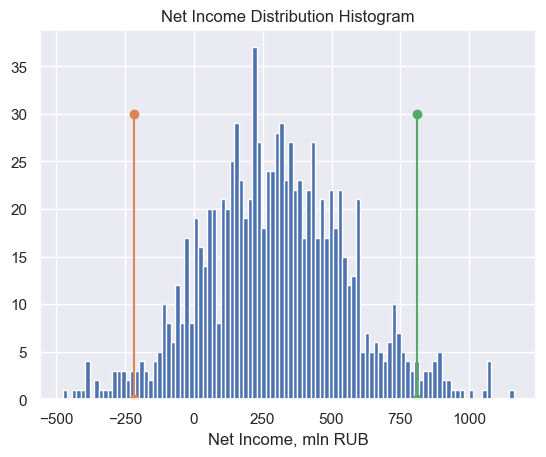

In [101]:
net_income_bootstrap(product_and_predicted_0)

#### 4.4.2 Bootstrap on initial data of 2nd field data_1

Average Net Income from 200 Best Dwells: 414.83570000000003 mln RUB

1% quantile: -56.0397 mln RUB
99% quantile: 879.37 mln RUB

95% confidence interval: (16.254760668259962, 813.41663933174) mln RUB
Loss probability is equal to 2.40% and is less than acceptable, the region meets the criteria


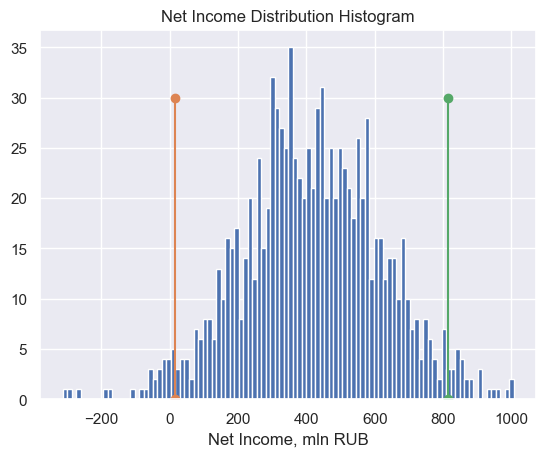

In [102]:
net_income_bootstrap(product_and_predicted_1)

#### 4.4.3 Bootstrap on initial data of 3rd field data_2

Average Net Income from 200 Best Dwells: 447.19702 mln RUB

1% quantile: -172.288 mln RUB
99% quantile: 1051.9417999999998 mln RUB

95% confidence interval: (-93.78258798842154, 988.1766279884216) mln RUB
The probability of loss is 4.90% and is more than allowed, the region does NOT meet the criteria


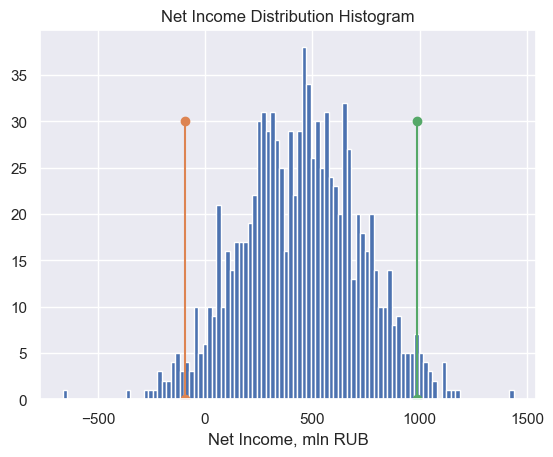

In [103]:
net_income_bootstrap(product_and_predicted_2)

## ***Conclusion***: 2nd drilling field is suitable for development (risk level < 2.5%)

- All three fields for development are within the budget, the maximum profit is brought by 200 wells in the 2nd and 3rd fields (more than 400 million RUB). While in the 1st - about 300 million RUB.

- The largest volume of production is observed in the 1st and 3rd regions. However, in the 3rd region - the highest cost of developing the field.

- 1-ое и 3-е месторождения обладают высокой вероятностью убытков (11.5% и 4.9% соответственно), поэтому не проходят по критериям установленной бизнес-задачи (вероятность убытков должна быть меньше 2,5 %). Также эта ситуация хорошо описывается 95-% доверительным интервалом. Левая граница, которая отделяет 2.5 % данных для трех регионов принимает отрицательное значение, что говорит о том, что более 2.5 % выборок имеют отрицательную прибыль.

- 1st and 3rd fields have a high probability of losses (11.5% and 4.9% respectively), therefore they do not meet the criteria of the established business task (the probability of losses should be less than 2.5%). 

- Also, this situation is well described by the 95% confidence interval. The left border, which separates 2.5% of the data for the three regions, takes a negative value, which indicates that more than 2.5% of the samples have a negative profit.

- **In the 2nd region, the probability of losses is 2.4% and is less than acceptable, the region meets the criteria of the task. The 2nd field is recommended for development within the proposed budget and conditions.**

_Thank you for going through this project. Your feedback and comments are very welcome to_ **_ybezginova2021@gmail.com_**

_Thank you!_

_Best wishes,_

_Yulia_